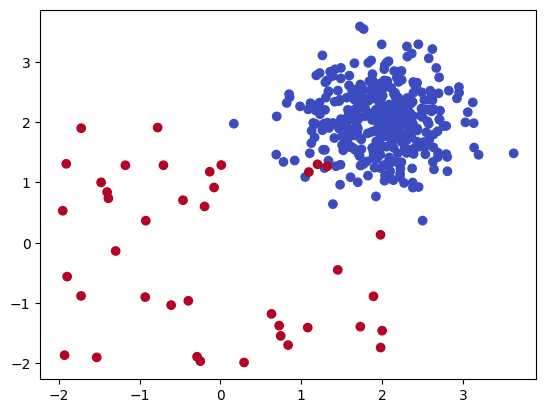

In [43]:
# Ex 1 
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = generate_data(n_train=400, n_test=100, n_features=2,contamination=0.1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o')
plt.show()

[0.         0.         0.         0.01111111 0.01111111 0.02222222
 0.02222222 1.        ] [0.  0.1 0.6 0.6 0.8 0.8 1.  1. ] [2.06511306 1.06511306 0.67528469 0.66050697 0.52889169 0.5164094
 0.36300529 0.05566553]


c:\Python310\lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


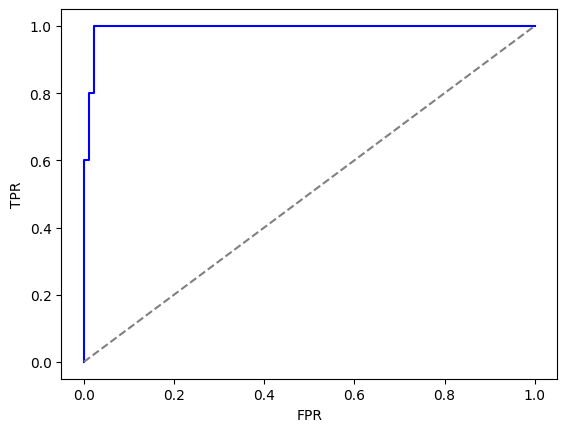

In [44]:
# Ex 2

from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, roc_curve 

knn_model = KNN(contamination=0.1)

knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

[[TN, FP], [FN, TP]] = confusion_matrix(y_test, predictions)
fpr = TP / (TP + FN)
tnr = TN / (TN + FP)
balanced_accuracy = (fpr + tnr) / 2

y_scores = knn_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [45]:
# Ex 3
import numpy as np
from sklearn.metrics import balanced_accuracy_score


X_train, _, y_train, _ = generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1)

mean = np.mean(X_train)
std = np.std(X_train)

z = (X_train - mean) / std

threshold = np.quantile(np.abs(z), 0.9)

y_pred = np.where(np.abs(z) > threshold, 1, 0)

balanced_acc = balanced_accuracy_score(y_train, y_pred)

print(balanced_acc)

0.9611111111111111


Balanced Accuracy: 0.5055555555555555


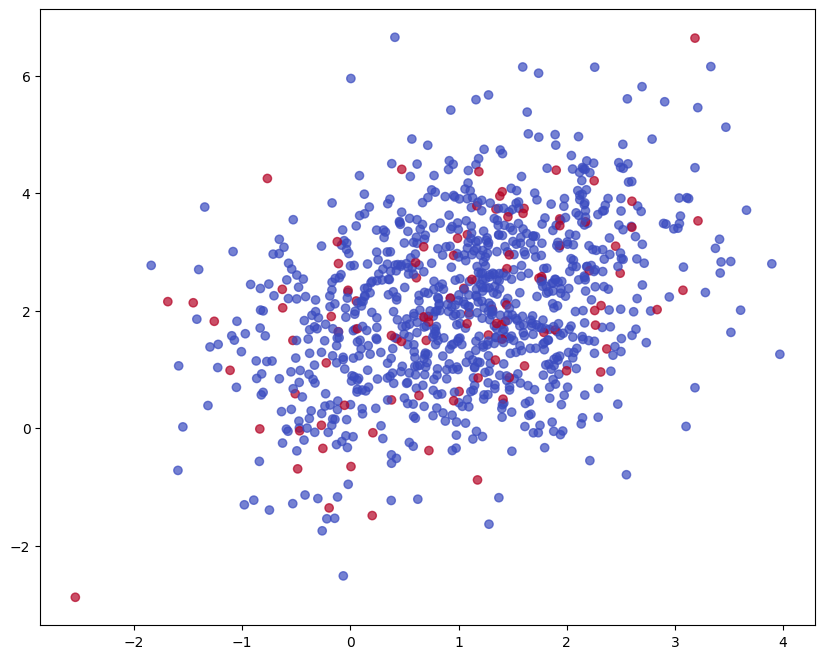

In [46]:
# Ex 4
import numpy as np
from sklearn.metrics import balanced_accuracy_score

n_samples = 1000
n_features = 3
contamination = 0.1

mean = np.array([1, 2, 3])
cov = np.array([
    [1.0, 0.5, 0.3],
    [0.5, 2.0, 0.7],
    [0.3, 0.7, 1.5]
])

L = np.linalg.cholesky(cov)
normal_samples = np.random.standard_normal((n_samples, n_features))
X = mean + np.dot(normal_samples, L.T)

n_outliers = int(contamination * n_samples)
y = np.zeros(n_samples)
y[:n_outliers] = 1
np.random.shuffle(y)

inv_cov = np.linalg.inv(cov)
diff = X - mean
distance = np.sqrt(np.sum(np.dot(diff, inv_cov) * diff, axis=1))

threshold = np.quantile(distance, 1 - contamination)
y_pred = np.where(distance > threshold, 1, 0)

balanced_acc = balanced_accuracy_score(y, y_pred)

print(f"Balanced Accuracy: {balanced_acc}")

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()